In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime

In [105]:
# Import webscraped data
df = pd.read_json (r'data/webscraped_data.json')
df.head(5)

,debunk_id,hoax_link,true_false,title,body,sources
0,1,http://www.paulomouvementcitoyen.com/2017/02/u...,FAUX,Un prêtre agressé à Avignon:,"action citoyenne, sécurité et citoyenneté Prêt...",https://www.over-blog.com/cookies
1,1,https://www.blog.sami-aldeeb.com/2017/02/06/pr...,FAUX,Your connection is not private,Attackers might be trying to steal your inform...,
2,1,https://francaisdefrance.wordpress.com/2016/12...,FAUX,Francaisdefrance's Blog12/12/2016,"Soyons solidaire de notre Église, A diffuser, ...",https://subscribe.wordpress.com/
3,1,https://www.lemonde.fr/les-decodeurs/article/2...,VRAI,Des militants dénoncent l’omerta des médias su...,Consulterle journal Sur les sites de vente en ...,https://lemonde.fr/confidentialite/
4,2,https://www.buzzbeed.com/macron-veut-faire-pay...,FAUX,Macron veut faire payer un loyer aux propriéta...,BuzzBeed Site à vocation parodique (dans la me...,https://www.buzzbeed.com/sabonner


In [106]:
# Create a list referencing all failures to scrape data
rows_to_rm = ["We couldn't find the page you are looking for",
              "Your connection is not private",
              "This site can’t be reached",
              "404Page non trouvée !",
              "Erreur 404!BLABLA & CHAT EN DIRECT",
              "Not found, error 404Popular Right Now",
              "70news.wordpress.com is no longer available.",
              "Oops! That page can’t be found.Recent Posts",
              "Erreur 404",
              "404 Not Found",
              "Not Found",
              "Page Not Found",
              "404Page inexistante",
              "La page que vous avez demandé n'existe pas",
              "Please turn JavaScript on and reload the page.",
              "Oops! Something went wrong here",
              "Page not found (404)",
              "The server can not find the requested page",
              "Error 404",
              "Le blog a été supprimé",
              "Oops! That page can’t be found.",
              "403 Forbidden",
              "Apologies, but the page you requested could",
              "404 - Page Not Found",
              "Page non trouvée",
              "Page not found",
              "You may not be able to visit this page because",
              "Oops",
              "Ooops",
              "404 ERROR",
              "Erreur de serveur404",
              "page can’t be found",
              "page couldn’t be found",
              "is for sale",
              "is no longer available",
              "Cette page n’est malheureusement pas disponible",
              "Cette page n’est pas disponible",
              "503 Service Temporarily Unavailable",
              "Je ne suis pas un robot",
              "This page isn’t available",
              "It Looks like the page you are looking for",
              "Erreur de serveur404",
              "UNE ERREUR EST SURVENUE",
              "la page ne peut pas être trouvée",
              "Cette page est introuvable",
              "la page que vous recherchez", 
              "Page désactivée", 
              "Error 404"]

# Remove all rows containing previous strings
df_clean = df[~df['title'].str.contains('|'.join(rows_to_rm), na=False)]
df_clean.head(5)

,debunk_id,hoax_link,true_false,title,body,sources
0,1,http://www.paulomouvementcitoyen.com/2017/02/u...,FAUX,Un prêtre agressé à Avignon:,"action citoyenne, sécurité et citoyenneté Prêt...",https://www.over-blog.com/cookies
2,1,https://francaisdefrance.wordpress.com/2016/12...,FAUX,Francaisdefrance's Blog12/12/2016,"Soyons solidaire de notre Église, A diffuser, ...",https://subscribe.wordpress.com/
3,1,https://www.lemonde.fr/les-decodeurs/article/2...,VRAI,Des militants dénoncent l’omerta des médias su...,Consulterle journal Sur les sites de vente en ...,https://lemonde.fr/confidentialite/
4,2,https://www.buzzbeed.com/macron-veut-faire-pay...,FAUX,Macron veut faire payer un loyer aux propriéta...,BuzzBeed Site à vocation parodique (dans la me...,https://www.buzzbeed.com/sabonner
5,2,https://crosscheck.firstdraftnews.com/checked-...,VRAI,Macron a-t-il déclaré vouloir faire payer un l...,First Draft and \nGoogle News Lab Travailler e...,https://firstdraftnews.com


In [107]:
print("Nombre d'observations supprimées suite au filtrage des erreurs 404 :", df.shape[0] - df_clean.shape[0])

Nombre d'observations supprimées suite au filtrage des erreurs 404 : 550


In [108]:
# Remove all rows which failed to be scraped and are equal to a NoneType
df_clean = df_clean.replace(to_replace='None', value=np.nan).dropna()

In [109]:
df_clean.shape

(2254, 6)

In [110]:
# Remove all rows which have empty values in the title and body columns
cols = ['title', 'body']
df_clean = df_clean[~df_clean[cols].replace('', np.nan).isin([np.nan]).all(axis=1)]

In [111]:
df_clean.shape

(2124, 6)

In [112]:
print("Nombre d'observations supprimées suite au premier filtrage :", df.shape[0] - df_clean.shape[0])

Nombre d'observations supprimées suite au premier filtrage : 692


In [114]:
df_clean = df_clean.drop(df.index[[17, 19, 20, 26, 34, 50, 52, 55, 57, 58, 59, 60, 62, 64, 65, 66, 68, 70, 71, 73,
                                   76, 108, 118, 133, 163, 165, 225, 255, 257, 289, 346, 385, 386, 387, 389, 390, 391,
                                   392, 393, 395, 396, 397, 407, 409, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 
                                   421, 439, 440, 441, 466, 467, 468, 469, 470, 489, 495, 497, 523, 536, 541, 542, 564, 
                                   570, 571, 625, 634, 637, 643, 656, 686, 756, 842, 857, 859, 860, 861, 862, 863, 873, 
                                   894, 904, 912, 932, 961, 1052, 1090, 1095, 1097, 1101, 1124, 1153, 1154, 1156, 1157,
                                   1165, 1167, 1210, 1211, 1218, 1219, 1231, 1246, 1250, 1251, 1255, 1256, 1259, 1269,
                                   1270, 1273, 1275, 1277, 1278, 1347, 1351, 1378, 1379, 1382, 1386, 1393, 1395, 1396,
                                   1397, 1399, 1401, 1410, 1422, 1424, 1425, 1428, 1436, 1437, 1444, 1445, 1446, 1463, 
                                   1468, 1470, 1478, 1482, 1501, 1502, 1504, 1509, 1510, 1512, 1513, 1514, 1515, 1516, 
                                   1518, 1526, 1527, 1530, 1609, 1611, 1617, 1643, 1682, 1714, 1738, 1739, 1740, 1741, 
                                   1743, 1744, 1745, 1827, 1828, 1829, 1832, 1833, 1839, 1841, 1842, 1845, 1852, 1853, 
                                   1870, 1911, 1977, 1978, 1979, 1980, 1981, 1985, 1994, 2002, 2009, 2024, 2027, 2030, 
                                   2034, 2046, 2064, 2072, 2074, 2110, 2126, 2127, 2128, 2180, 2193, 2312, 2323, 2334, 
                                   2336, 2338, 2367, 2371, 2381, 2389, 2536, 2537, 2538, 2539, 2552, 2659, 2744, 2747, 
                                   2748, 2750, 2751, 2752, 2755, 2793, 2799]])

In [115]:
df_clean.shape

(1888, 6)

In [116]:
list(df_clean.body.loc[[2711]])

['Amazon va fermer tous ses sites en\xa0France pour cinq jours Amazon : «\xa0La crise nous fait basculer dans les nouveaux Temps modernes\xa0» Le congé s’échange comme une monnaie «\xa0Le gouvernement rompt l’équilibre entre l’activité de l’entreprise et le droit au repos des travailleurs\xa0» Notre-Dame, Saint-Denis... Faut-il reconstruire les monuments détruits\xa0? Incendie de Notre-Dame : pourquoi ces vidéos ne prouvent rien sur les origines du feu Au cœur du chantier de Notre-Dame, « mine d’or pour les chercheurs\xa0» Les masques faits maison sont-ils efficaces\xa0contre le coronavirus\xa0? «\xa0Celles qui se salissent les mains pour les autres\xa0» Roberto Saviano\xa0: «\xa0La faiblesse, c’est de se croire invincible\xa0» «\xa0Gardons-nous de tomber dans une réactivité maladive, viro-induite, sociale et politique\xa0» La Chine, elle aussi, doit annuler des dettes africaines Le comédien Maurice Barrier est mort du\xa0Covid-19 Coulon, Philippon, Reid… Leur livre de chevet en temps 

In [117]:
# Remove all patterns related to the following message
df_clean['body'] = df_clean['body'].str.replace(r'Consulterle journal Amazon va fermer tous ses sites en\xa0France pour cinq jours Amazon :', '')
df_clean['body'] = df_clean['body'].str.replace(r'Amazon va fermer tous ses sites en\xa0France pour cinq jours Amazon :', '')

In [120]:
df_clean = df_clean.drop(df.index[[49, 51, 63, 290, 292, 373, 380, 1020, 1092, 1119, 1141, 1155, 1208, 1342, 1344, 1345, 
                                  1346, 1357, 1358, 1360, 1372, 1373, 1385, 1400, 1442, 1607, 1645, 2172, 2226, 2638, 
                                   2699, 2771]])

In [121]:
print("Nombre d'observations supprimées suite au premier filtrage :", df.shape[0] - 692 - df_clean.shape[0])

Nombre d'observations supprimées suite au premier filtrage : 268


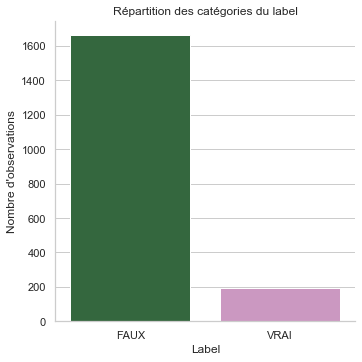

In [124]:
# Finally, we must take a look at our label to see the class imbalance
sns.set(style = 'whitegrid')

# Plot the information sources
sns.catplot(x = 'true_false', 
            kind = 'count', 
            palette = 'cubehelix', 
            data = df_clean).set(title = 'Répartition des catégories du label', 
                                     xlabel = 'Label', 
                                     ylabel = 'Nombre d\'observations')

In [125]:
df_clean.shape

(1856, 6)

In [130]:
filename = './data/webscraped_cleaned_' + datetime.now().strftime("%Y-%m-%d-%H%M%S.json")
df_clean.to_json(filename)